In [13]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
# URL сайта
url = 'https://www.mk.ru/'

# Отправляем GET-запрос на сайт
response = requests.get(url)

# Проверяем, что запрос прошел успешно
if response.status_code == 200:
    # Парсим содержимое страницы
    soup = BeautifulSoup(response.content, 'html.parser')

    # Находим все ссылки на новости
    news_links = []
    for link in soup.find_all('a', href=True):
        href = link['href']
        if href.endswith('.html'):
            news_links.append(f"https://www.mk.ru{href}")

    # Сохраняем ссылки в CSV файл
    with open('news_links.csv', 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Link'])
        for link in news_links:
            writer.writerow([link])

    print("Ссылки успешно сохранены в news_links.csv")
else:
    print(f"Ошибка при запросе страницы: {response.status_code}")

Ссылки успешно сохранены в news_links.csv


In [6]:
# Чистим собранные ссылки, удаляя дублирующуюся часть в начале каждой строки
with open('news_links.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    cleaned_links = [row for row in reader]
with open('news_links_cleaned.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    for row in cleaned_links:
        if row[0].startswith('https://www.mk.ruhttps://www.mk.ru'):
            row[0] = row[0].replace('https://www.mk.ruhttps://www.mk.ru', 'https://www.mk.ru', 1)
        writer.writerow(row)

print("Ссылки успешно очищены и сохранены в news_links_cleaned.csv")

Ссылки успешно очищены и сохранены в news_links_cleaned.csv


In [7]:
# Требуется доп очистка
filtered_links = []
with open('news_links_cleaned.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Пропускаем заголовок
    for row in reader:
        link = row[0]
        if not (link.startswith('https://www.mk.ruhttps://') or link.startswith('https://www.mk.ru/photo') or link.startswith('https://www.mk.ru/video') or link.startswith('https://www.mk.ru/merinov')):
            filtered_links.append(row)

# Сохраняем отфильтрованные ссылки в новый CSV файл
with open('news_links_filtered.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Link'])
    for row in filtered_links:
        writer.writerow(row)

print("Ссылки успешно отфильтрованы и сохранены в news_links_filtered.csv")

Ссылки успешно отфильтрованы и сохранены в news_links_filtered.csv


In [12]:
# Функция для парсинга данных со страницы новости
def parse_news_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Парсим заголовок
        title = soup.find('h1', class_='article__title').get_text(strip=True) if soup.find('h1', class_='article__title') else ''

        # Парсим текст, исключая теги <p> с вложенными <strong>
        paragraphs = soup.find_all('p')
        text = ' '.join([p.get_text(strip=True) for p in paragraphs if not p.find('strong')])

        # Парсим дату и время
        datetime_tag = soup.select_one('body > div.wraper > div.wraper__content > div.article-grid > div.article-grid__content > main > div.article__meta > p > span:nth-child(1) > time')
        if datetime_tag and 'datetime' in datetime_tag.attrs:
            datetime_str = datetime_tag['datetime']
            date, time = datetime_str.split('T')
            time = time.split('+')[0]
        else:
            date, time = '', ''

        # Парсим количество просмотров
        views_tag = soup.select_one('body > div.wraper > div.wraper__content > div.article-grid > div.article-grid__content > main > div.article__meta > p > span.meta__item.meta__item_views.meta__item_first-line > span')
        views = views_tag.get_text(strip=True) if views_tag else ''

        # Парсим метки
        tags = [tag.get_text(strip=True) for tag in soup.find_all('a', class_='article__tag-item')]

        return {
            'Title': title,
            'Text': text,
            'Date': date,
            'Time': time,
            'Views': views,
            'Tags': ', '.join(tags)
        }
    else:
        print(f"Ошибка при запросе страницы: {response.status_code}")
        return None

# Читаем ссылки из очищенного CSV файла
with open('news_links_filtered.csv', 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Пропускаем заголовок
    links = [row[0] for row in reader]

# Парсим данные со всех страниц новостей и сохраняем в новый CSV файл
parsed_data = []
for link in links:
    news_data = parse_news_page(link)
    if news_data:
        parsed_data.append(news_data)

# Сохраняем данные в новый CSV файл
with open('parsed_news_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'Text', 'Date', 'Time', 'Views', 'Tags']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for data in parsed_data:
        writer.writerow(data)

print("Данные успешно сохранены в parsed_news_data.csv")

Данные успешно сохранены в parsed_news_data.csv


[nltk_data] Downloading package punkt to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Наиболее частотные слова:
редакция: 291
московский: 218
комсомолец: 217
газеты: 195
аo: 194
года: 186
это: 167
москва: 111
связи: 106
главный: 104
сфере: 101
технологий: 100
зарегистрировано: 99
адрес: 99
редактор: 99
сторон: 99
издание: 98
информационных: 98
подписаться: 97
электронное: 97


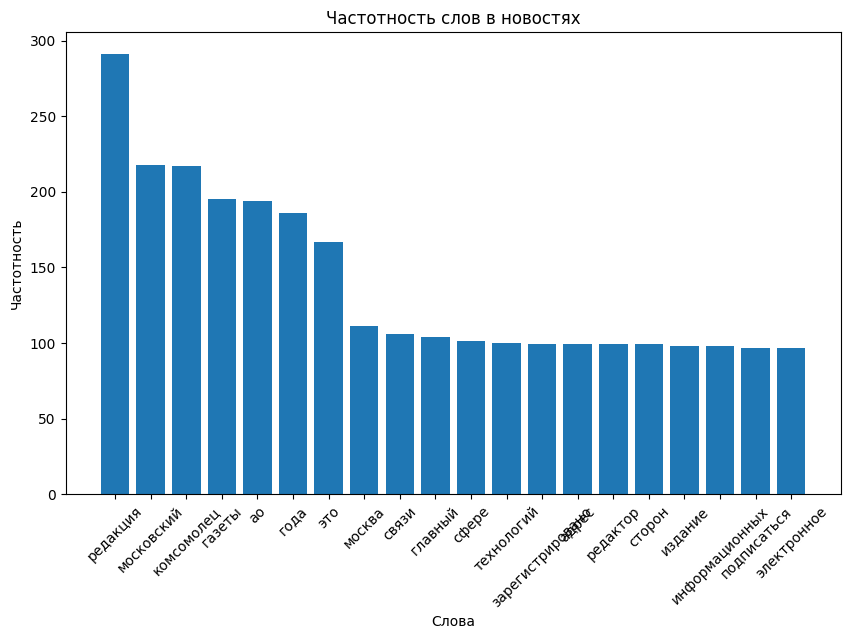

In [14]:
# Загружаем данные из CSV файла
df = pd.read_csv('parsed_news_data.csv')

# Объединяем все тексты новостей в один большой текст
all_text = ' '.join(df['Text'].dropna())

# Токенизация текста
nltk.download('punkt')
words = word_tokenize(all_text)

# Удаляем стоп-слова
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Считаем частотности слов
word_freq = Counter(filtered_words)

# Выводим наиболее частотные слова
most_common_words = word_freq.most_common(20)
print("Наиболее частотные слова:")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Рисуем диаграмму частотности слов
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Слова')
plt.ylabel('Частотность')
plt.title('Частотность слов в новостях')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Далее идет ДЗ 2
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec, FastText
from gensim.models.keyedvectors import KeyedVectors
import numpy as np

[nltk_data] Downloading package punkt to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\Sonya Hornygold\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


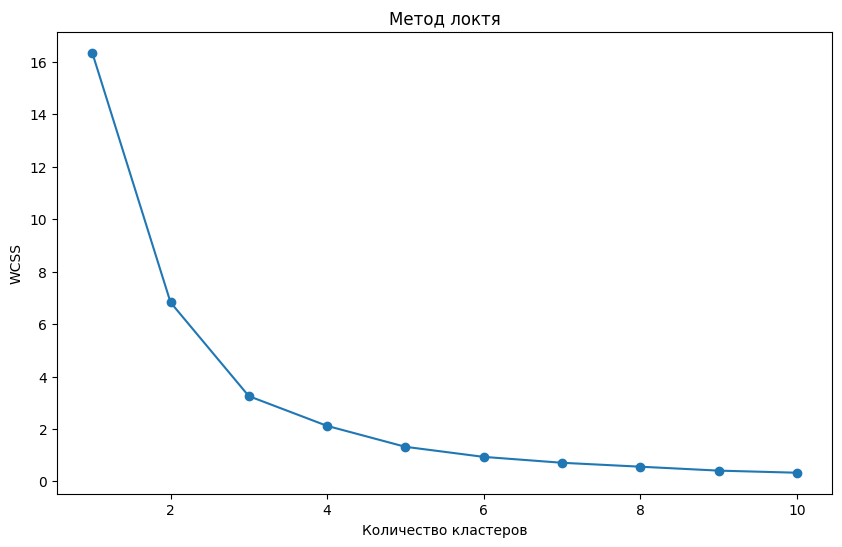

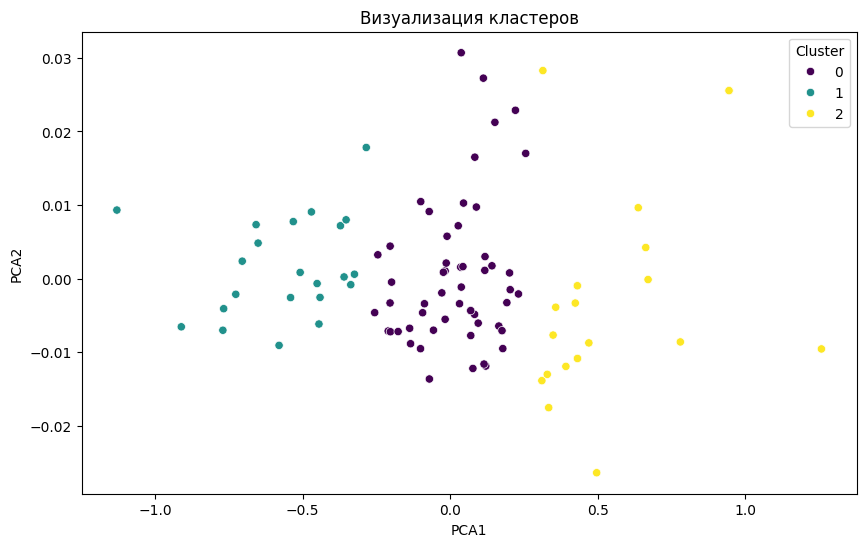

In [16]:
df = pd.read_csv('parsed_news_data.csv')

# Токенизация текста и удаление стоп-слов
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

def preprocess_text(text):
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words

df['ProcessedText'] = df['Text'].apply(preprocess_text)

# Применение TF-IDF преобразования
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, max_df=0.95, min_df=2, use_idf=True, norm=None)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ProcessedText'])

# Векторизация текстов с помощью Word2Vec/FastText с весами TF-IDF
model = FastText(sentences=df['ProcessedText'], vector_size=100, window=5, min_count=2, workers=4)
word_vectors = model.wv

# Создание матрицы весов TF-IDF для каждого слова
tfidf_weights = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

# Векторизация текстов с использованием весов TF-IDF
def get_weighted_vector(tokens, word_vectors, tfidf_weights):
    vector = np.zeros(word_vectors.vector_size)
    count = 0
    for token in tokens:
        if token in word_vectors and token in tfidf_weights:
            vector += word_vectors[token] * tfidf_weights[token]
            count += 1
    if count != 0:
        vector /= count
    return vector

df['Vector'] = df['ProcessedText'].apply(lambda x: get_weighted_vector(x, word_vectors, tfidf_weights))

# Преобразование векторов в матрицу
X = np.vstack(df['Vector'])

# Подбор оптимального k с использованием метода локтя
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

# Оптимальное k
optimal_k = 3  # Выберите оптимальное k на основе графика

# Кластеризация с использованием K-means
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

# Визуализация представления текстов в векторном пространстве
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Визуализация кластеров')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [19]:
# ДЗ 3

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

[nltk_data] Downloading package punkt to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classification Report:
                                                                                                            precision    recall  f1-score   support

                                                                                FIG, Россия, Калуга, Спорт       0.00      0.00      0.00         1
                                                                            Адыгея, Республика Адыгея, Суд       0.00      0.00      0.00         1
                                                                                            Анна Семенович       0.00      0.00      0.00         1
                                                                Армия, Владимир Зеленский, Курская область       0.00      0.00      0.00         1
                Армия, Владимир Путин, Россия, Донецкая народная республика, Луганская народная республика       0.00      0.00      0.00         1
                                                                                   Армия

c:\Users\Sonya Hornygold\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sonya Hornygold\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sonya Hornygold\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

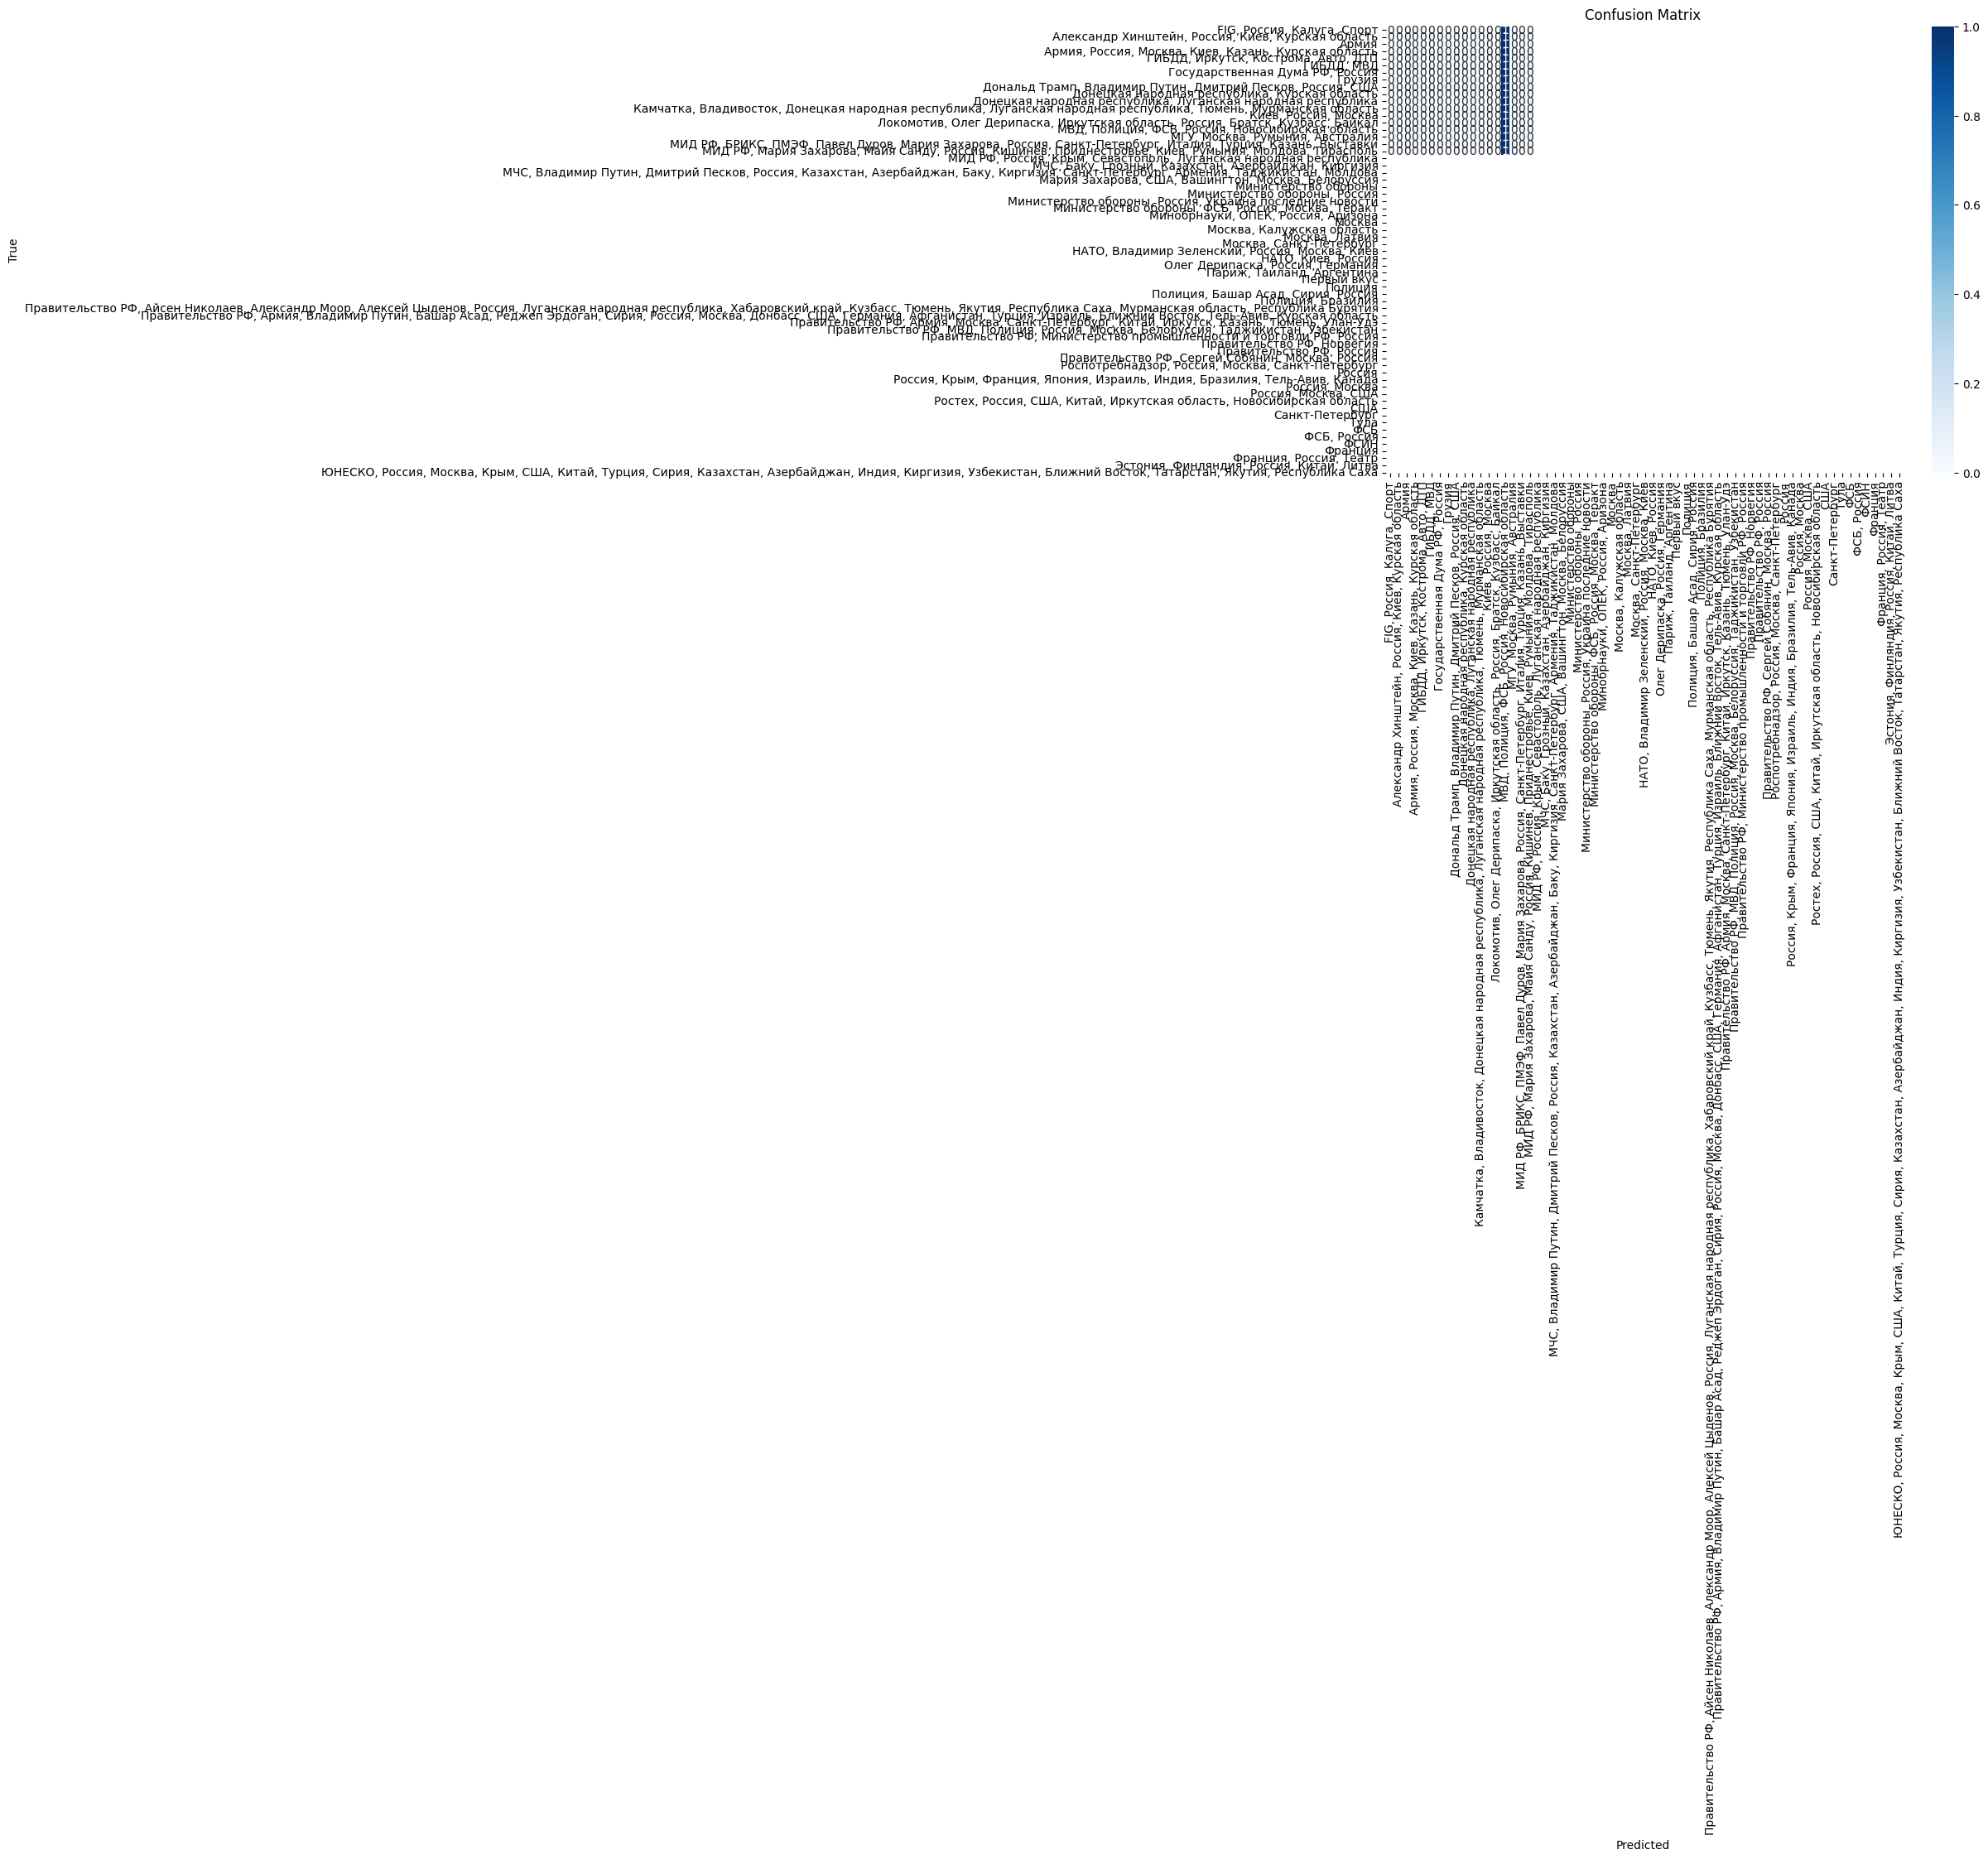

In [22]:
df = pd.read_csv('parsed_news_data.csv')

# Токенизация текста и удаление стоп-слов
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

def preprocess_text(text):
    if pd.isna(text):
        return ''
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)

df['ProcessedText'] = df['Text'].apply(preprocess_text)

# Обработка пропущенных значений
df.dropna(subset=['ProcessedText', 'Tags'], inplace=True)

# Применение TF-IDF преобразования
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=list(stop_words))
X = tfidf_vectorizer.fit_transform(df['ProcessedText'])

# Целевая переменная (например, категория новости)
y = df['Tags']  # Предполагается, что 'Tags' содержит категории новостей

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение классификатора (например, логистическая регрессия)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = classifier.predict(X_test)

# Оценка качества классификатора
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Визуализация матрицы смежности
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Дз 3 часть Б
from nltk.util import ngrams
from collections import defaultdict, Counter
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense

In [ ]:

df = pd.read_csv('parsed_news_data.csv')

# Токенизация текста и удаление стоп-слов
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

def preprocess_text(text):
    if pd.isna(text):
        return ''
    words = word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]
    return filtered_words

df['ProcessedText'] = df['Text'].apply(preprocess_text)

# Обработка пропущенных значений
df.dropna(subset=['ProcessedText'], inplace=True)

# Объединяем все тексты в один большой корпус
corpus = [word for sublist in df['ProcessedText'] for word in sublist]

# Создаем биграммы и триграммы
bigrams = list(ngrams(corpus, 2))
trigrams = list(ngrams(corpus, 3))

# Создаем модель на основе биграмм
bigram_model = defaultdict(Counter)
for bigram in bigrams:
    bigram_model[bigram[0]][bigram[1]] += 1

# Создаем модель на основе триграмм
trigram_model = defaultdict(Counter)
for trigram in trigrams:
    trigram_model[(trigram[0], trigram[1])][trigram[2]] += 1

# Функция для генерации текста на основе биграмм
def generate_text_bigram(model, start_word, length=100):
    current_word = start_word
    text = [current_word]
    for _ in range(length - 1):
        if current_word in model:
            next_word = random.choices(list(model[current_word].keys()), weights=list(model[current_word].values()))[0]
        else:
            next_word = random.choice(corpus)
        text.append(next_word)
        current_word = next_word
    return ' '.join(text)

# Функция для генерации текста на основе триграмм
def generate_text_trigram(model, start_words, length=100):
    current_words = start_words
    text = list(current_words)
    for _ in range(length - 2):
        if current_words in model:
            next_word = random.choices(list(model[current_words].keys()), weights=list(model[current_words].values()))[0]
        else:
            next_word = random.choice(corpus)
        text.append(next_word)
        current_words = (current_words[1], next_word)
    return ' '.join(text)

# Генерация текстов
start_word = random.choice(corpus)
start_words = (start_word, random.choice([word for word in corpus if word != start_word]))

bigram_text = generate_text_bigram(bigram_model, start_word, length=100)
trigram_text = generate_text_trigram(trigram_model, start_words, length=100)

print("Generated text using bigrams:")
print(bigram_text)

print("\nGenerated text using trigrams:")
print(trigram_text)

# Параметры для нейросетевых моделей
vocab_size = 10000
max_length = 100
embedding_dim = 64

# Токенизация текста
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['ProcessedText'])
sequences = tokenizer.texts_to_sequences(df['ProcessedText'])

# Паддинг последовательностей
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Создание обучающих данных
X = padded_sequences[:, :-1]
y = padded_sequences[:, 1:]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

# Функция для создания модели
def create_model(rnn_layer):
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length-1),
        rnn_layer,
        Dense(vocab_size, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Создание моделей
simple_rnn_model = create_model(SimpleRNN(128))
gru_model = create_model(GRU(128))
lstm_model = create_model(LSTM(128))

# Обучение моделей
simple_rnn_model.fit(X, y, epochs=10, batch_size=64)
gru_model.fit(X, y, epochs=10, batch_size=64)
lstm_model.fit(X, y, epochs=10, batch_size=64)

# Функция для генерации текста
def generate_text(model, tokenizer, seed_text, max_length=100):
    for _ in range(max_length):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_length-1, padding='post')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = tf.argmax(predicted, axis=-1).numpy()[0]
        output_word = tokenizer.index_word[predicted_word_index]
        seed_text += " " + output_word
    return seed_text

# Генерация текстов
seed_text = " ".join(random.choices(corpus, k=10))

simple_rnn_text = generate_text(simple_rnn_model, tokenizer, seed_text)
gru_text = generate_text(gru_model, tokenizer, seed_text)
lstm_text = generate_text(lstm_model, tokenizer, seed_text)

print("Generated text using SimpleRNN:")
print(simple_rnn_text)

print("\nGenerated text using GRU:")
print(gru_text)

print("\nGenerated text using LSTM:")
print(lstm_text)

[nltk_data] Downloading package punkt to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sonya
[nltk_data]     Hornygold\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Generated text using bigrams:
техник дима гордей илья поликарпов силовики сработали четко моментально диетолог порекомендовала покупать листовой чай заваривать отдельно стеклянном чайнике ранее сообщалось глава бурятии сагаалган туве шагаа марта года д стр телефон info главный редактор учредитель третьих сторон вчера юрист вадим виноградов напомнил чтопенсионеры освобождены налога землю природу человека портреты которого являлась именно сочетание этих строк предлагают банальные конкурсы подходят созданию объединенного курдского игрока активно расследует факт мир написал глава мвд уточнил украина останется части команда отделения центра мурманской области информации второе место явились украинские боевики застрелили оккупированном ими санкционного режима книге ближняя дача сталина генсек взглянул собравшихся очень полостей это такие

Generated text using trigrams:
техник редакция трудом водитель равно близится преподавателей королева ситуацию исламистского редактор комсомолец редакция в

c:\Users\Sonya Hornygold\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 99, 10000), output.shape=(None, 10000)